In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.ticker as plticker
from matplotlib.dates import YearLocator
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970755,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
970756,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
970757,241711348,07/19/2024 12:00:00 AM,07/19/2024 12:00:00 AM,757,17,Devonshire,1751,2,888,TRESPASSING,...,IC,Invest Cont,888.0,NaN,NaN,NaN,10000 OLD DEPOT PLAZA RD,NaN,34.2500,-118.5990
970758,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [4]:
columns_to_detect = [
    'DR_NO',
    'Date Rptd',
    'DATE OCC',
    'TIME OCC',
    'AREA NAME',
    'Crm Cd Desc',
    'Vict Age',
    'Vict Sex',
    'Vict Descent',
    'Premis Desc',
    'Status Desc',
    'LAT',
    'LON'
]
df = df[columns_to_detect]

In [5]:
df.shape

(970760, 13)

# 1. dealing with null values

In [6]:
df.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex        134812
Vict Descent    134822
Premis Desc        583
Status Desc          0
LAT                  0
LON                  0
dtype: int64

In [7]:
df['Vict Sex'] = df['Vict Sex'].fillna('N/A')
df['Vict Descent'] = df['Vict Descent'].fillna('N/A')
df['Premis Desc'] = df['Premis Desc'].fillna('N/A')

C:\Users\mande\AppData\Local\Temp\ipykernel_36656\2809856581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vict Sex'] = df['Vict Sex'].fillna('N/A')
C:\Users\mande\AppData\Local\Temp\ipykernel_36656\2809856581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vict Descent'] = df['Vict Descent'].fillna('N/A')
C:\Users\mande\AppData\Local\Temp\ipykernel_36656\2809856581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [8]:
df.isnull().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA NAME       0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Desc     0
Status Desc     0
LAT             0
LON             0
dtype: int64

# 2. datetime values

In [9]:
## datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format = '%m/%d/%Y %I:%M:%S %p')

C:\Users\mande\AppData\Local\Temp\ipykernel_36656\2401769511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format = '%m/%d/%Y %I:%M:%S %p')


In [10]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format = '%m/%d/%Y %I:%M:%S %p')

C:\Users\mande\AppData\Local\Temp\ipykernel_36656\1437434794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format = '%m/%d/%Y %I:%M:%S %p')


In [11]:
df['TIME OCC'] = df['TIME OCC'].astype(str)

df.loc[df['TIME OCC'].astype(str).str.len() == 1, 'TIME OCC'] = df['TIME OCC'] + '00'

df.loc[df['TIME OCC'].astype(str).str.len() == 2, 'TIME OCC'] = '00' + df['TIME OCC']

df['TIME_OCC'] = df['DATE OCC'].dt.strftime('%Y-%m-%d') + " " + df['TIME OCC'].str[:-2]+ ":" + df['TIME OCC'].str[-2:]

df['TIME_OCC'] = pd.to_datetime(df['TIME_OCC'])

C:\Users\mande\AppData\Local\Temp\ipykernel_36656\821959003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIME OCC'] = df['TIME OCC'].astype(str)
C:\Users\mande\AppData\Local\Temp\ipykernel_36656\821959003.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIME_OCC'] = df['DATE OCC'].dt.strftime('%Y-%m-%d') + " " + df['TIME OCC'].str[:-2]+ ":" + df['TIME OCC'].str[-2:]
C:\Users\mande\AppData\Local\Temp\ipykernel_36656\821959003.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

In [12]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Status Desc,LAT,LON,TIME_OCC
0,190326475,2020-03-01,2020-03-01,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,Adult Arrest,34.0375,-118.3506,2020-03-01 21:30:00
1,200106753,2020-02-09,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),Invest Cont,34.0444,-118.2628,2020-02-08 18:00:00
2,200320258,2020-11-11,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Invest Cont,34.0210,-118.3002,2020-11-04 17:00:00
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,Invest Cont,34.1576,-118.4387,2020-03-10 20:37:00
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,Invest Cont,34.0944,-118.3277,2020-08-17 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970755,240710284,2024-07-24,2024-07-23,1400,Wilshire,VEHICLE - STOLEN,0,N/A,N/A,STREET,Invest Cont,34.0362,-118.3284,2024-07-23 14:00:00
970756,240104953,2024-01-15,2024-01-15,100,Central,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,X,HOTEL,Invest Cont,34.0685,-118.2460,2024-01-15 01:00:00
970757,241711348,2024-07-19,2024-07-19,757,Devonshire,TRESPASSING,0,X,X,MTA - ORANGE LINE - CHATSWORTH,Invest Cont,34.2500,-118.5990,2024-07-19 07:57:00
970758,240309674,2024-04-24,2024-04-24,1500,Southwest,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,Invest Cont,34.0215,-118.2868,2024-04-24 15:00:00


# 3. Age cleaning and categorisation

In [13]:
#### remove entries whose age is less than 0. manual error
df = df[~(df['Vict Age'] < 0)]

In [14]:
df['Vict Age Category'] = None
df.loc[df['Vict Age'] == 0 , 'Vict Age Category'] = 'N/A'
df.loc[(df['Vict Age'] > 0) & (df['Vict Age'] <= 3) , 'Vict Age Category'] = 'Babies'
df.loc[(df['Vict Age'] > 3) & (df['Vict Age'] <= 12) , 'Vict Age Category'] = 'Kids'
df.loc[(df['Vict Age'] > 12) & (df['Vict Age'] <= 18) , 'Vict Age Category'] = 'Teenagers'
df.loc[(df['Vict Age'] > 18) & (df['Vict Age'] <= 30) , 'Vict Age Category'] = 'Young Adults'
df.loc[(df['Vict Age'] > 30) & (df['Vict Age'] <= 55) , 'Vict Age Category'] = 'Adults'
df.loc[(df['Vict Age'] > 55) , 'Vict Age Category'] = 'Senior'

C:\Users\mande\AppData\Local\Temp\ipykernel_36656\1536319719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vict Age Category'] = None


In [15]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Status Desc,LAT,LON,TIME_OCC,Vict Age Category
0,190326475,2020-03-01,2020-03-01,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,Adult Arrest,34.0375,-118.3506,2020-03-01 21:30:00,N/A
1,200106753,2020-02-09,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),Invest Cont,34.0444,-118.2628,2020-02-08 18:00:00,Adults
2,200320258,2020-11-11,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Invest Cont,34.0210,-118.3002,2020-11-04 17:00:00,Young Adults
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,Invest Cont,34.1576,-118.4387,2020-03-10 20:37:00,Young Adults
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,Invest Cont,34.0944,-118.3277,2020-08-17 12:00:00,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970755,240710284,2024-07-24,2024-07-23,1400,Wilshire,VEHICLE - STOLEN,0,N/A,N/A,STREET,Invest Cont,34.0362,-118.3284,2024-07-23 14:00:00,N/A
970756,240104953,2024-01-15,2024-01-15,100,Central,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,X,HOTEL,Invest Cont,34.0685,-118.2460,2024-01-15 01:00:00,N/A
970757,241711348,2024-07-19,2024-07-19,757,Devonshire,TRESPASSING,0,X,X,MTA - ORANGE LINE - CHATSWORTH,Invest Cont,34.2500,-118.5990,2024-07-19 07:57:00,N/A
970758,240309674,2024-04-24,2024-04-24,1500,Southwest,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,Invest Cont,34.0215,-118.2868,2024-04-24 15:00:00,Senior


# 4. Renaming Vict Descent

In [16]:
d = {
    'A' : 'Other Asian','B' : 'Black','C' : 'Chinese','D' : 'Cambodian','F' : 'Filipino','G' : 'Guamanian',
    'H' : 'Hispanic/Latin/Mexican','I' : 'American Indian/Alaskan Native','J' : 'Japanese','K' : 'Korean',
    'L' : 'Laotian','O' : 'Other','P' : 'Pacific Islander','S' : 'Samoan','U' : 'Hawaiian',
    'V' : 'Vietnamese','W' : 'White','X' : 'Unknown','Z' : 'Asian Indian'
}

In [17]:
df['Vict Descent'] = df['Vict Descent'].replace(d)

C:\Users\mande\AppData\Local\Temp\ipykernel_36656\110476672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vict Descent'] = df['Vict Descent'].replace(d)


In [18]:
df = df[~((df['Vict Descent'] == '-') | (df['Vict Sex'] == '-')) ]

In [19]:
# df['Year'] = df['TIME_OCC'].dt.date.apply(lambda row: row.replace(day = 1 , month = 1))
# df['Year_Month'] = df['TIME_OCC'].dt.date.apply(lambda row: row.replace(day = 1))

In [20]:
df.shape

(970629, 15)

In [21]:
df = df[(df['TIME_OCC'].dt.date >= datetime.date(2020, 1, 1)) & 
   (df['TIME_OCC'].dt.date <= datetime.date(2024, 7, 31))]

# 1. TIME SERIES ANALYSIS

## 1. How has crime trended over time?

In [22]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Status Desc,LAT,LON,TIME_OCC,Vict Age Category
0,190326475,2020-03-01,2020-03-01,2130,Wilshire,VEHICLE - STOLEN,0,M,Other,STREET,Adult Arrest,34.0375,-118.3506,2020-03-01 21:30:00,N/A
1,200106753,2020-02-09,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,Other,BUS STOP/LAYOVER (ALSO QUERY 124),Invest Cont,34.0444,-118.2628,2020-02-08 18:00:00,Adults
2,200320258,2020-11-11,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Invest Cont,34.0210,-118.3002,2020-11-04 17:00:00,Young Adults
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,Other,CLOTHING STORE,Invest Cont,34.1576,-118.4387,2020-03-10 20:37:00,Young Adults
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,Hispanic/Latin/Mexican,SIDEWALK,Invest Cont,34.0944,-118.3277,2020-08-17 12:00:00,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970754,242004546,2024-01-16,2024-01-16,1510,Olympic,BATTERY - SIMPLE ASSAULT,80,F,Other,BUS STOP,Invest Cont,34.0690,-118.3054,2024-01-16 15:10:00,Senior
970755,240710284,2024-07-24,2024-07-23,1400,Wilshire,VEHICLE - STOLEN,0,N/A,N/A,STREET,Invest Cont,34.0362,-118.3284,2024-07-23 14:00:00,N/A
970756,240104953,2024-01-15,2024-01-15,100,Central,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,Unknown,HOTEL,Invest Cont,34.0685,-118.2460,2024-01-15 01:00:00,N/A
970757,241711348,2024-07-19,2024-07-19,757,Devonshire,TRESPASSING,0,X,Unknown,MTA - ORANGE LINE - CHATSWORTH,Invest Cont,34.2500,-118.5990,2024-07-19 07:57:00,N/A


In [23]:
# Group by both year and month for more granular analysis
monthly_crime = df.groupby([df['TIME_OCC'].dt.to_period('M').dt.to_timestamp()])[['DR_NO']].count()
monthly_crime['rolling_avg_6'] = monthly_crime.rolling(window = 6)['DR_NO'].mean()
previous_month = monthly_crime.shift(1)
monthly_crime_mom = ((monthly_crime - previous_month) / previous_month) * 100

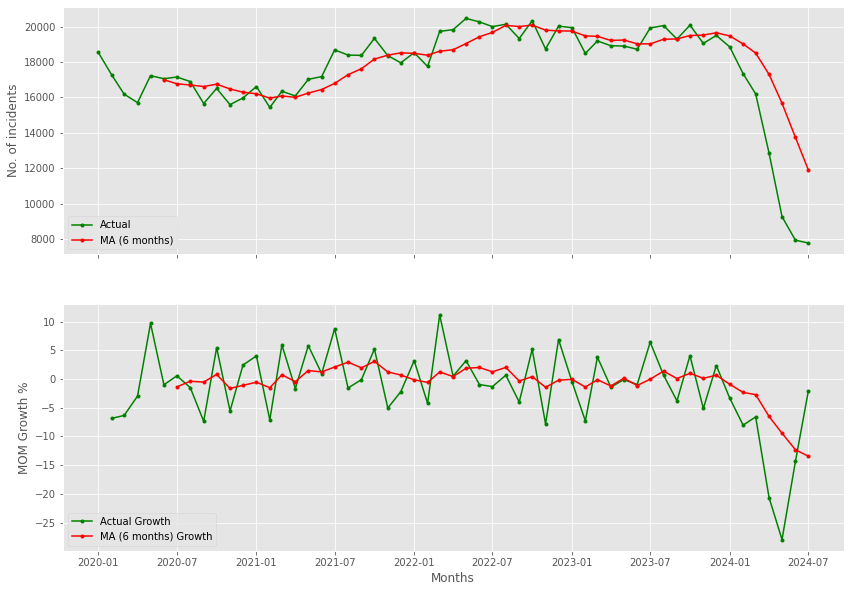

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.set_size_inches(14, 10)
ax1.plot(monthly_crime.index , monthly_crime['DR_NO'], color = 'green', marker = '.', label = 'Actual')
ax1.plot(monthly_crime.index , monthly_crime['rolling_avg_6'], color = 'red', marker = '.', label = 'MA (6 months)')
ax1.set_ylabel('No. of incidents')
# ax1.set_xlabel('Months')
ax1.legend(loc = 'lower left')


ax2.plot(monthly_crime_mom.index , monthly_crime_mom['DR_NO'], color = 'green', marker = '.', label = 'Actual Growth')
ax2.plot(monthly_crime_mom.index , monthly_crime_mom['rolling_avg_6'], color = 'red', marker = '.', label = 'MA (6 months) Growth')
ax2.set_ylabel('MOM Growth %')
ax2.set_xlabel('Months')
ax2.legend(loc = 'lower left')

## 2. Is there seasonality in crime rates? Do certain months or seasons have more crimes?

In [25]:
## removing the 2024 year data.

<Axes: xlabel='Month'>

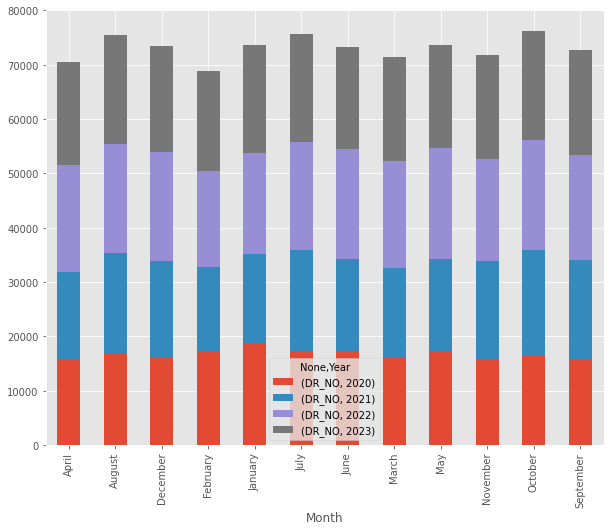

In [26]:
season_trends = df[df['TIME_OCC'].dt.date <= datetime.date(2023 , 12, 31)].copy()
season_trends['Month'] = season_trends['TIME_OCC'].dt.strftime('%B')
season_trends['Year'] = season_trends['TIME_OCC'].dt.year
season_trends_month = season_trends.groupby(['Month', 'Year'])[['DR_NO']].count().unstack()
season_trends_month.plot(kind = 'bar', stacked = True, figsize = (10, 8))

## 3. Do crime rates vary by time of day?**

<Axes: xlabel='time_of_crime'>

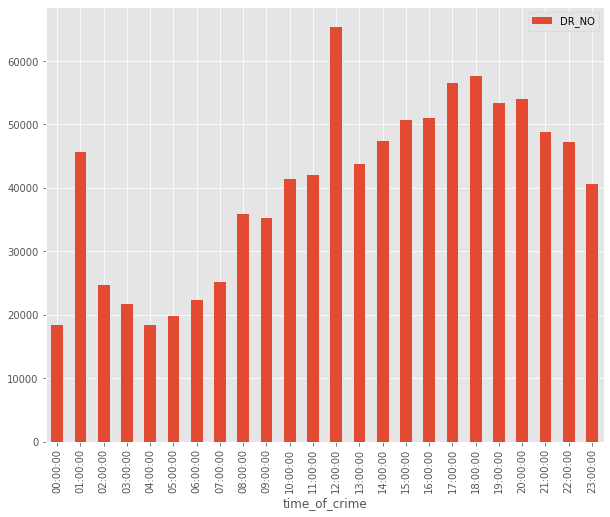

In [27]:
df['time_of_crime'] = df['TIME_OCC'].dt.to_period('H').dt.to_timestamp().dt.time
df.groupby('time_of_crime')[['DR_NO']].count().plot(kind = 'bar', figsize = (10 , 8))

# 2. CRIME TYPE ANALYSIS

## 1. What are the most common types of crimes?

In [28]:
df['Year'] = df['TIME_OCC'].dt.year

<Axes: xlabel='Crm Cd Desc'>

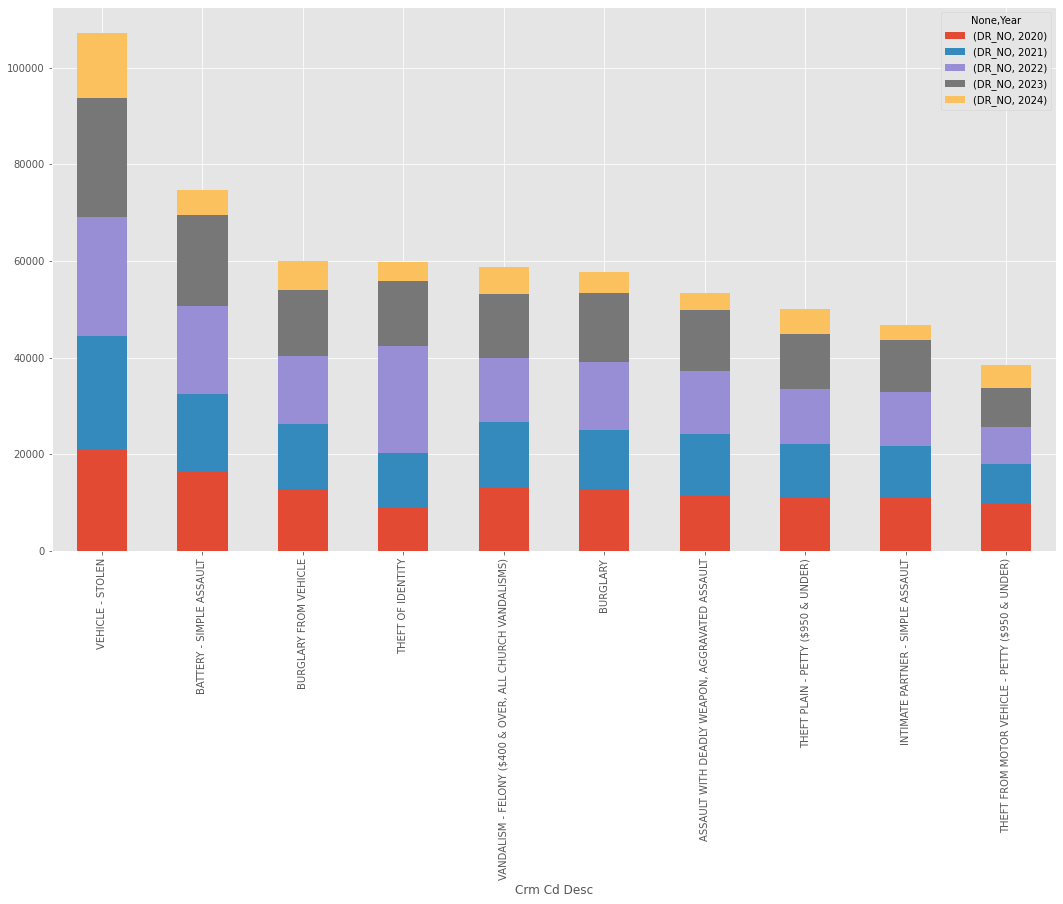

In [29]:
year_wise_crime = df.groupby(['Crm Cd Desc','Year'])[['DR_NO']].count().unstack()
year_wise_crime['Total'] = year_wise_crime.sum(axis = 1)
year_wise_crime = year_wise_crime.sort_values(by = 'Total',ascending = False).drop(columns = ['Total'])
top_fifteen_crimes = list(year_wise_crime.head(10).index)
year_wise_crime.head(10).plot(kind = 'bar', stacked = True,figsize = (18 , 10))

## 2. Which crimes have increased or decreased over time?

In [30]:
year_wise_crime_change = (year_wise_crime.pct_change(axis = 1) * 100)

In [31]:
year_wise_crime_change = year_wise_crime_change.drop(columns = [('DR_NO', 2024), ('DR_NO', 2020)])

In [32]:
(year_wise_crime_change['DR_NO'] == 0).sum(axis = 1).sort_values(ascending = False)

Crm Cd Desc
BIKE - ATTEMPTED STOLEN                                     3
THEFT, COIN MACHINE - ATTEMPT                               3
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM    2
PICKPOCKET, ATTEMPT                                         2
DISHONEST EMPLOYEE - GRAND THEFT                            1
                                                           ..
BATTERY POLICE (SIMPLE)                                     0
ARSON                                                       0
CONTEMPT OF COURT                                           0
DISCHARGE FIREARMS/SHOTS FIRED                              0
TRAIN WRECKING                                              0
Length: 139, dtype: int64

In [33]:
(year_wise_crime_change['DR_NO'].isnull()).sum(axis = 1).sort_values(ascending = False)

Crm Cd Desc
TRAIN WRECKING                                      3
DISHONEST EMPLOYEE ATTEMPTED THEFT                  2
INCITING A RIOT                                     2
BLOCKING DOOR INDUCTION CENTER                      2
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)        1
                                                   ..
BATTERY POLICE (SIMPLE)                             0
ARSON                                               0
CONTEMPT OF COURT                                   0
DISCHARGE FIREARMS/SHOTS FIRED                      0
SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT    0
Length: 139, dtype: int64

In [34]:
year_wise_crime_change = year_wise_crime_change.loc[~(year_wise_crime_change.index.isin(['BIKE - ATTEMPTED STOLEN' , 
                                                              'THEFT, COIN MACHINE - ATTEMPT', 'TRAIN WRECKING']))]

<Axes: xlabel='Crm Cd Desc'>

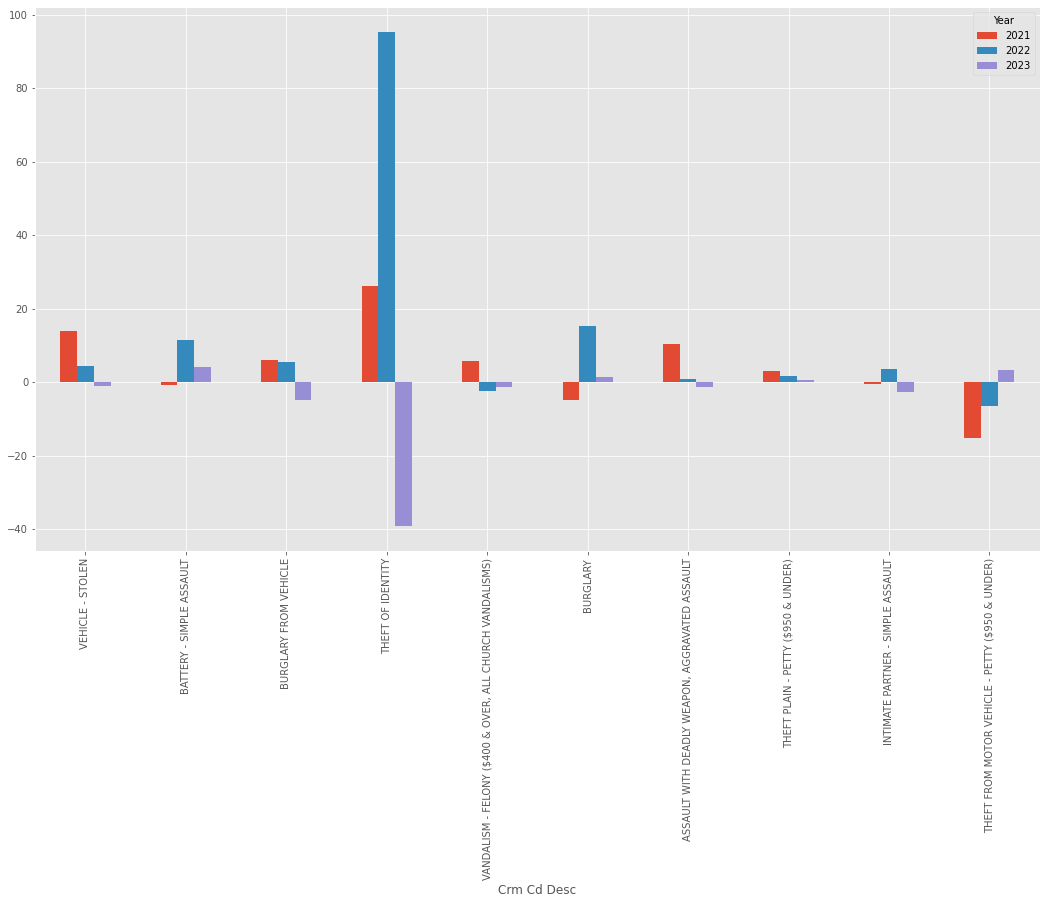

In [35]:
year_wise_crime_change.loc[year_wise_crime_change.index.isin(top_fifteen_crimes), :]['DR_NO'].plot(kind = 'bar', figsize = (18 , 10), rot = 90)

In [36]:
monotonic_incr = year_wise_crime_change.apply(lambda row: row.is_monotonic_increasing, axis = 1)
monotonic_decr = year_wise_crime_change.apply(lambda row: row.is_monotonic_decreasing, axis = 1)

In [37]:
year_wise_crime_change['monotonic_incr'] = monotonic_incr
year_wise_crime_change['monotonic_decr'] = monotonic_decr

<Axes: xlabel='Crm Cd Desc'>

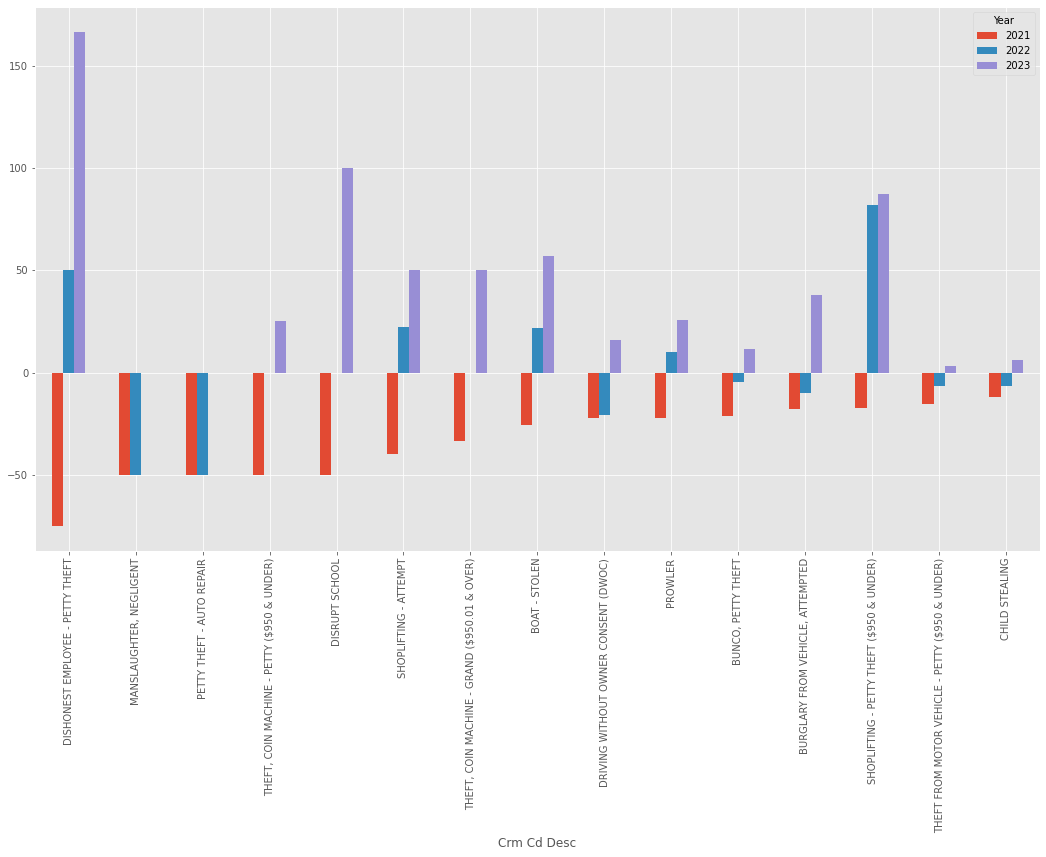

In [38]:
year_wise_crime_change[year_wise_crime_change[('monotonic_incr', '')] == True]['DR_NO'].sort_values(by = [2021 , 2022, 2023]).head(15).plot(kind = 'bar', figsize = (18, 10))

<Axes: xlabel='Crm Cd Desc'>

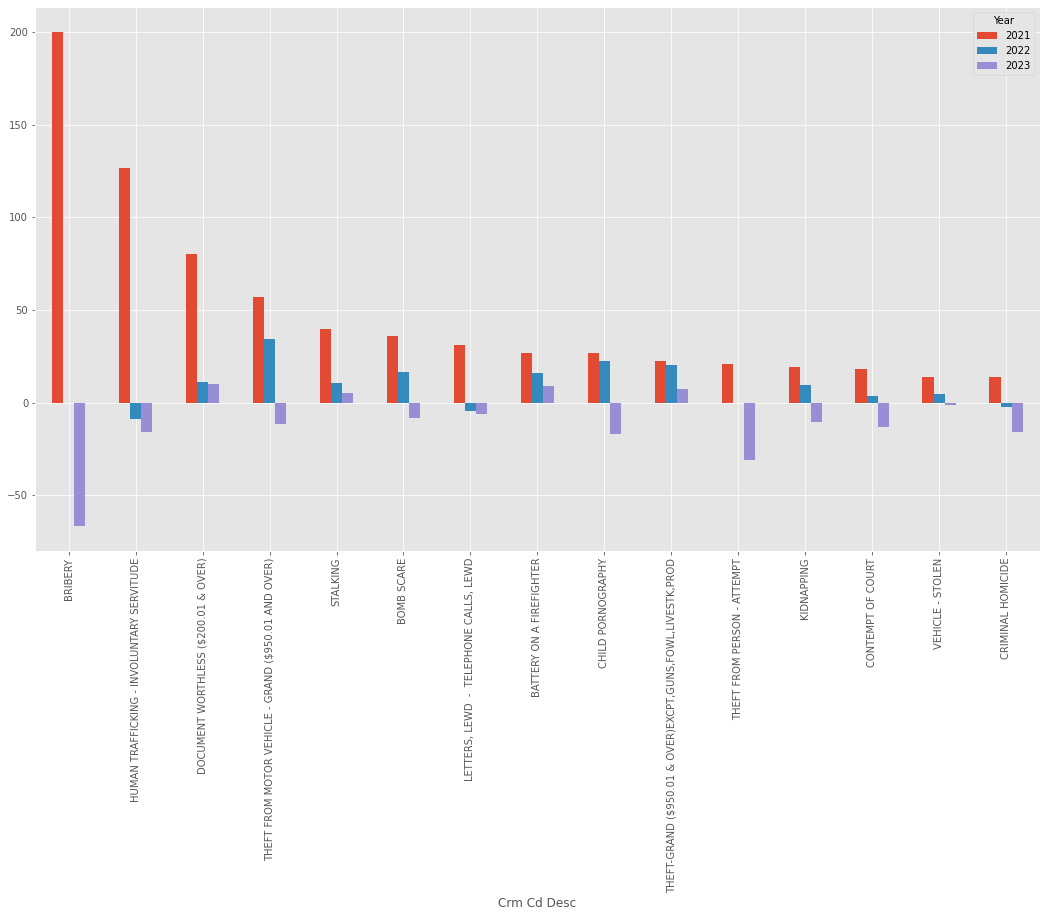

In [39]:
year_wise_crime_change[year_wise_crime_change[('monotonic_decr', '')] == True]['DR_NO'].sort_values(by = [2021 , 2022, 2023], ascending = False).head(15).plot(kind = 'bar', figsize = (18, 10))